**ANALYZING INDIAN STARTUP FUNDING TRENDS (2018-2021) WITH CRISP-DM**

**Description:**

This project conducts an in-depth analysis of funding trends within the Indian startup ecosystem from 2018 to 2021, employing the CRISP-DM methodology. Leveraging comprehensive datasets on funding details, our goal is to identify patterns, fluctuations, and key insights into the funding landscape of Indian startups during this period. By examining funding amounts, types, sectors, and geographical distributions, we aim to provide actionable recommendations for stakeholders navigating the dynamic funding environment.

**Hypothesis**

**Null Hypothesis (H₀)**

The funding landscape of Indian startups from 2018 to 2021 is not significantly influenced by economic conditions, industry sector performance, and investor sentiments.

**Alternative Hypothesis (H₁)**

The funding landscape of Indian startups from 2018 to 2021 is significantly influenced by economic conditions, industry sector performance, and investor sentiments.

**Primary Business Question:**

How have funding trends evolved in the Indian startup ecosystem from 2018 to 2021, and what insights can be derived to inform investment decisions, policy-making, and strategic planning for stakeholders?

**Sub-Questions:**

1. **Yearly Funding Trends:**

How did the total funding amounts received by startups change each year from 2018 to 2021?

Were there any significant peaks or troughs in funding during this period, and what external factors (e.g., economic conditions, policy changes) might have influenced these trends?

2. **Sector-Specific Funding Analysis:**

Which sectors (e.g., technology, healthcare, fintech) received the most funding, and how did this distribution change over the four years?

What characteristics make certain sectors more attractive to investors, and how have sector-specific trends impacted the overall funding landscape?

3. **Funding Stages and Evolution:**

What were the most common funding stages (e.g., seed, Series A, Series B) for Indian startups during this period?

How did the prevalence of different funding stages shift over time, and what does this indicate about the maturity and development of the Indian startup ecosystem?

4. **Geographical Distribution of Funding:**

How was funding distributed across various regions in India, and which regions emerged as major startup hubs from 2018 to 2021?

What factors contributed to the rise of these startup hubs, and how did regional policies or infrastructure developments influence funding patterns?

5. **Impact of External Factors:**

How did global economic trends, such as market fluctuations and international trade relations, affect funding trends in the Indian startup ecosystem?

In what ways did government policies, incentives, and regulatory changes impact the funding landscape?

How did advancements in technology and shifts in consumer behavior influence investor interest and funding decisions?

6. **Investor Behavior and Preferences:**

Who were the most active investors in the Indian startup ecosystem during this period, and what were their investment strategies?

How did investor preferences evolve concerning sectors, funding stages, and geographic locations?

7. **Success Metrics and Funding Outcomes:**

What correlation exists between the amount of funding received and the success metrics of startups (e.g., revenue growth, market expansion)?



**CRISP-DM Strategy (One-Month Timeline)**

**Week 1: Business Understanding & Data Understanding**
**Objective:** Define project objectives, gather requirements, and understand the provided datasets.

**Tasks:**
1. Conduct meetings with team members to clarify project goals and expectations.
2. Perform initial exploration of the datasets to understand their structure and content.
3. Identify key variables and metrics of interest for analysis.

**Week 2: Data Preparation and Cleaning**
**Objective:** Clean and preprocess the datasets to ensure they are ready for analysis.

**Tasks:**
1. Address missing values, remove duplicates, and handle inconsistencies in the data.
2. Conduct exploratory data analysis (EDA) to uncover patterns and trends.

**Week 3: Modeling & Evaluation**
**Objective:** Build models and evaluate their performance to derive insights.

**Tasks:**
1. Build predictive models to analyze startup success factors or funding outcomes.
2. Evaluate model performance using appropriate metrics and validation techniques.

**Week 4: Deployment**
**Objective:** Present findings and provide actionable recommendations to stakeholders.

**Tasks:**
1. Create visualizations and reports to communicate insights effectively.
2. Summarize key findings and implications for decision-making.
3. Present actionable recommendations based on the analysis.
4. Document the entire process, including methodologies, findings, and recommendations (Article).

## Business Understanding & Data Understanding

**Datasets Importation**

In [68]:
# Connect to the Database Using "pyodbc"
import pyodbc
print("pyodbc is installed and imported successfully")

import pyodbc
from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package
import pandas as pd
import warnings 

warnings.filterwarnings('ignore')

# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials set in the '.env' file
server = environment_variables.get("SERVER_NAME")
database = environment_variables.get("DATABASE_NAME")
login = environment_variables.get("LOGIN")
password = environment_variables.get("PASSWORD")





pyodbc is installed and imported successfully


In [69]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={login};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"


In [70]:
# connect to the Database
connection = pyodbc.connect(connection_string)
print("Connection successful")


Connection successful


In [71]:
# Query the Sql Database
query = "SELECT * FROM dbo.LP1_startup_funding2020"

# Execute the query and read the results into a DataFrame
data_1 = pd.read_sql(query, connection)


In [72]:
query = "SELECT * FROM dbo.LP1_startup_funding2021"

data_2 = pd.read_sql(query, connection)

In [73]:
# Load the CSV file into  DataFrame


df_data_3 = pd.read_csv('../CSV Files/startup_funding2018.csv')

df_data_4 = pd.read_csv('../CSV Files/startup_funding2019.csv')

**Initial Exploration**

In [74]:
# Inspect columns of each DataFrame
print("Columns in data_1:", data_1.columns)
print("Columns in data_2:", data_2.columns)
print("Columns in df_data_3:", df_data_3.columns)
print("Columns in df_data_4:", df_data_4.columns)


Columns in data_1: Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')
Columns in data_2: Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')
Columns in df_data_3: Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')
Columns in df_data_4: Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')


In [75]:
# Define a function to convert rupees to dollars
def rupees_to_dollars(amount, currency):
    if currency.lower() == 'rupees':
        return amount * 0.014  # Conversion rate from rupees to dollars
    else:
        return amount

In [76]:
# Standardize column names
df_data_3 = df_data_3.rename(columns={
    'Company Name': 'Company_Brand',
    'Industry': 'Sector',
    'Round/Series': 'Stage',
    'Amount': 'Amount',
    'Location': 'HeadQuarter',
    'About Company': 'What_it_does'
})

df_data_4 = df_data_4.rename(columns={
    'Company/Brand': 'Company_Brand',
    'What it does': 'What_it_does',
    'Amount($)': 'Amount'
})

In [77]:
# Ensure all DataFrames have the same columns
common_columns = ['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage', 'column10']


In [78]:

# Check if 'column10' is present in data_1 and data_2
if 'column10' not in data_1.columns:
    data_1['column10'] = pd.NA
if 'column10' not in data_2.columns:
    data_2['column10'] = pd.NA

# Add missing columns to df_data_3
for column in common_columns:
    if column not in df_data_3.columns:
        df_data_3[column] = pd.NA

# Add missing columns to df_data_4
for column in common_columns:
    if column not in df_data_4.columns:
        df_data_4[column] = pd.NA

# Align columns in each DataFrame
data_1 = data_1[common_columns]
data_2 = data_2[common_columns]
df_data_3 = df_data_3[common_columns]
df_data_4 = df_data_4[common_columns]

# Apply the conversion function to the 'Amount' column in all DataFrames
data_1['Amount'] = data_1.apply(lambda row: rupees_to_dollars(row['Amount'], 'dollars'), axis=1)
data_2['Amount'] = data_2.apply(lambda row: rupees_to_dollars(row['Amount'], 'dollars'), axis=1)
df_data_3['Amount'] = df_data_3.apply(lambda row: rupees_to_dollars(row['Amount'], 'dollars'), axis=1)
df_data_4['Amount'] = df_data_4.apply(lambda row: rupees_to_dollars(row['Amount'], 'dollars'), axis=1)



# Concatenate the DataFrames
merged_data = pd.concat([data_1, data_2, df_data_3, df_data_4], ignore_index=True)




**Initial Exploration**


In [80]:
# Display the first few rows of the combined DataFrame
print("First 5 rows of the merged dataset:")

merged_data.head()


First 5 rows of the merged dataset:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [83]:
# Display the structure of the combined DataFrame
print("\nStructure of the merged dataset:")
merged_data.info()


Structure of the merged dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2879 non-null   object 
 1   Founded        2110 non-null   float64
 2   HeadQuarter    2765 non-null   object 
 3   Sector         2861 non-null   object 
 4   What_it_does   2879 non-null   object 
 5   Founders       2334 non-null   object 
 6   Investor       2253 non-null   object 
 7   Amount         2622 non-null   object 
 8   Stage          1941 non-null   object 
 9   column10       2 non-null      object 
dtypes: float64(1), object(9)
memory usage: 225.0+ KB


In [82]:
# Display the summary statistics for the 'Amount' column
print("\nSummary statistics for the 'Amount' column:")

merged_data['Amount'].describe()



Summary statistics for the 'Amount' column:
count     2622
unique     774
top          —
freq       148
Name: Amount, dtype: object


In [84]:

# Check for missing values
print("\nMissing values in each column:")

merged_data.isnull().sum()


Missing values in each column:


Company_Brand       0
Founded           769
HeadQuarter       114
Sector             18
What_it_does        0
Founders          545
Investor          626
Amount            257
Stage             938
column10         2877
dtype: int64

In [85]:
# Display the number of unique values in each column
print("\nNumber of unique values in each column:")

print(merged_data.nunique())


Number of unique values in each column:
Company_Brand    2214
Founded            34
HeadQuarter       172
Sector            873
What_it_does     2691
Founders         1980
Investor         1777
Amount            774
Stage              75
column10            2
dtype: int64


In [86]:
# Convert 'Amount' column to numeric dtype, coercing errors to NaN
merged_data['Amount'] = pd.to_numeric(merged_data['Amount'], errors='coerce')

# Display the summary statistics for the 'Amount' column
print("\nSummary statistics for the 'Amount' column after conversion:")

merged_data['Amount'].describe()



Summary statistics for the 'Amount' column after conversion:


count    9.760000e+02
mean     9.496123e+07
std      2.243790e+09
min      7.500000e+03
25%      9.796475e+05
50%      2.800000e+06
75%      1.000000e+07
max      7.000000e+10
Name: Amount, dtype: float64

**Key Variables and Metrics of Interest for Analysis**


**1. Yearly Funding Trends:**

Amount: Total funding amounts received by startups each year.

Year: Yearly trend analysis.

**2. Sector-Specific Funding Analysis:**

Amount: Funding amounts received by startups in different sectors.

Sector: Sector classification of startups.

Year: Yearly trend analysis.

**3. Funding Stages and Evolution:**

Stage: Funding stage of startups (e.g., seed, Series A, Series B).

Year: Yearly trend analysis.

**4. Geographical Distribution of Funding:**

Amount: Funding amounts received by startups in different regions.

Headquarter Location: Geographical location of startups.

Year: Yearly trend analysis.

**5. Impact of External Factors:**

External factors: Economic conditions, policy changes, technological advancements, consumer behavior shifts.

Year: Yearly trend analysis.

**6. Investor Behavior and Preferences:**

Investor: Identity and characteristics of investors.

Amount: Investment amounts by investors.

Sector: Preferred sectors of investors.

Stage: Preferred funding stages of investors.

Year: Yearly trend analysis.

**7. Success Metrics and Funding Outcomes:**

Success metrics: Revenue growth, market expansion, profitability.

Amount: Correlation between funding amounts and success metrics.

Year: Yearly trend analysis.

## Data Preparation and Cleaning

**Addressing Missing Values, Removing Duplicates, and Handling Inconsistencies in the Data**

In [87]:
#Step 1: Identify missing values

missing_values = merged_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Company_Brand       0
Founded           769
HeadQuarter       114
Sector             18
What_it_does        0
Founders          545
Investor          626
Amount           1903
Stage             938
column10         2877
dtype: int64


In [89]:
#Step 2: Standardize Formats

# To ensure that 'Founded' is treated as numeric, and 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Stage' are strings.

merged_data['Founded'] = pd.to_numeric(merged_data['Founded'], errors='coerce')
merged_data['HeadQuarter'] = merged_data['HeadQuarter'].astype(str).str.title()  
merged_data['Sector'] = merged_data['Sector'].astype(str).str.title()
merged_data['What_it_does'] = merged_data['What_it_does'].astype(str).str.title()
merged_data['Founders'] = merged_data['Founders'].astype(str).str.title()
merged_data['Investor'] = merged_data['Investor'].astype(str).str.title()
merged_data['Stage'] = merged_data['Stage'].astype(str).str.title()

In [90]:
# Step 3: Handle missing values
merged_data['Founded'].fillna(merged_data['Founded'].median(), inplace=True)
merged_data['HeadQuarter'].fillna(merged_data['HeadQuarter'].mode()[0], inplace=True)
merged_data['Sector'].fillna(merged_data['Sector'].mode()[0], inplace=True)
merged_data['Founders'].fillna('Unknown', inplace=True)  
merged_data['Investor'].fillna('Unknown', inplace=True)  
merged_data['Amount'].fillna(merged_data['Amount'].median(), inplace=True)  
merged_data['Stage'].fillna(merged_data['Stage'].mode()[0], inplace=True)


In [91]:
# Step 4: Remove duplicates
merged_data.drop_duplicates(inplace=True)


In [92]:
# Step 5: Handle inconsistencies
merged_data['Company_Brand'] = merged_data['Company_Brand'].str.lower()

In [93]:
# Step 6: Remove 'column10' column
merged_data.drop(columns=['column10'], inplace=True)

In [94]:
# Ensure 'Founded' column is integer after filling missing values
merged_data['Founded'] = merged_data['Founded'].astype(int)

# Display the cleaned dataset
print("Cleaned Dataset:")

merged_data.head()

Cleaned Dataset:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,aqgromalin,2019,Chennai,Agritech,Cultivating Ideas For Profit,"Prasanna Manogaran, Bharani C L",Angel Investors,200000.0,None
1,krayonnz,2019,Bangalore,Edtech,An Academy-Guardian-Scholar Centric Ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",Gsf Accelerator,100000.0,Pre-Seed
2,padcare labs,2018,Pune,Hygiene Management,Converting Bio-Hazardous Waste To Harmless Waste,Ajinkya Dhariya,Venture Center,2800000.0,Pre-Seed
3,ncome,2020,New Delhi,Escrow,Escrow-As-A-Service Platform,Ritesh Tiwari,"Venture Catalysts, Pointone Capital",400000.0,None
4,gramophone,2016,Indore,Agritech,Gramophone Is An Agtech Platform Enabling Acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None


In [95]:
merged_data.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 2853 entries, 0 to 2878
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2853 non-null   object 
 1   Founded        2853 non-null   int32  
 2   HeadQuarter    2853 non-null   object 
 3   Sector         2853 non-null   object 
 4   What_it_does   2853 non-null   object 
 5   Founders       2853 non-null   object 
 6   Investor       2853 non-null   object 
 7   Amount         2853 non-null   float64
 8   Stage          2853 non-null   object 
dtypes: float64(1), int32(1), object(7)
memory usage: 211.7+ KB


In [97]:
# Verify that the cleaned dataset has no missing values

missing_values = merged_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64


In [99]:
# Checking for duplicates

duplicates = merged_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [100]:
# Checking Data Types

data_types = merged_data.dtypes
print("Data types of each column:\n", data_types)


Data types of each column:
 Company_Brand     object
Founded            int32
HeadQuarter       object
Sector            object
What_it_does      object
Founders          object
Investor          object
Amount           float64
Stage             object
dtype: object


In [114]:
# Summary Statistics


# summary_statistics = merged_data.describe(include='all')
# print("Summary statistics for the dataset:")
# summary_statistics

summary_statistics = merged_data.describe(include='all')
print("Summary statistics for the dataset:\n", summary_statistics)

Summary statistics for the dataset:
        Company_Brand      Founded HeadQuarter   Sector                      What_it_does Founders Investor        Amount Stage
count           2853  2853.000000        2853     2853                              2853     2853     2853  2.853000e+03  2853
unique          2152          NaN         173      837                              2690     1980     1759           NaN    71
top         bharatpe          NaN   Bangalore  Fintech  Provides Online Learning Classes      Nan      Nan           NaN  None
freq               9          NaN         756      256                                 5      528      525           NaN   881
mean             NaN  2016.318612         NaN      NaN                               NaN      NaN      NaN  3.415538e+07   NaN
std              NaN     3.757992         NaN      NaN                               NaN      NaN      NaN  1.312627e+09   NaN
min              NaN  1963.000000         NaN      NaN                    

**Exploratory Data Analysis (EDA)**

**Import Necessary Libraries**

In [109]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set the visualisation style
sns.set(style="whitegrid")

# Display settings for larger outputs
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)


**Visualize the Distribution of the "Founded" Column**

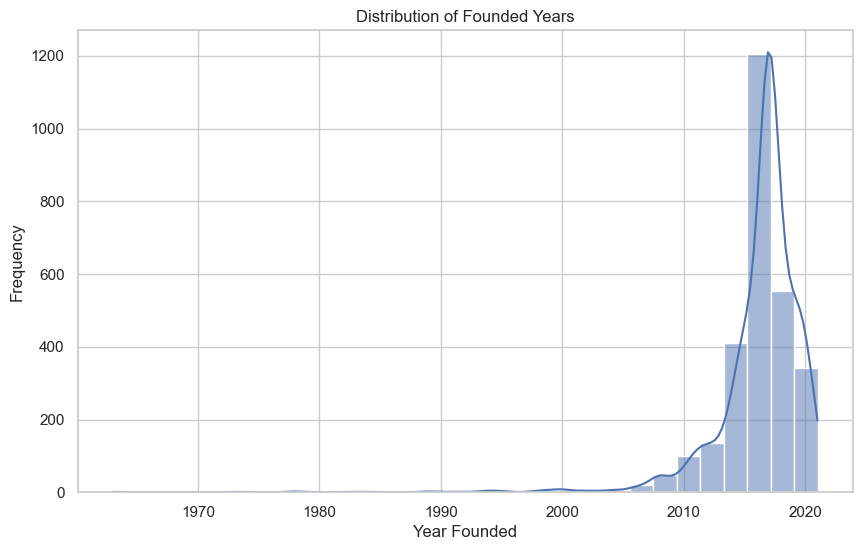

In [110]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Founded'], bins=30, kde=True)
plt.title('Distribution of Founded Years')
plt.xlabel('Year Founded')
plt.ylabel('Frequency')
plt.show()


**Visualize the Distribution of the "Amount" Column**

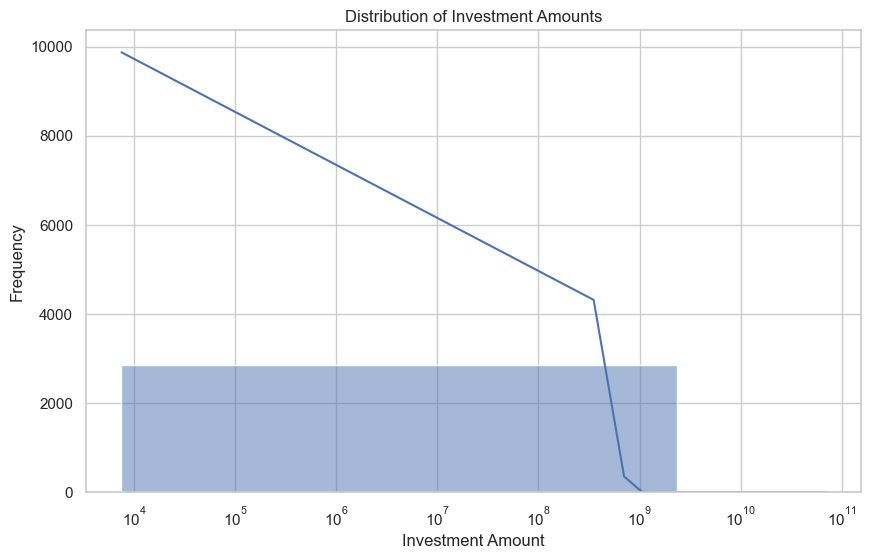

In [111]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Amount'], bins=30, kde=True)
plt.title('Distribution of Investment Amounts')
plt.xlabel('Investment Amount')
plt.ylabel('Frequency')
plt.xscale('log')  # Log scale for better visualization
plt.show()


**Correlation Matrix**

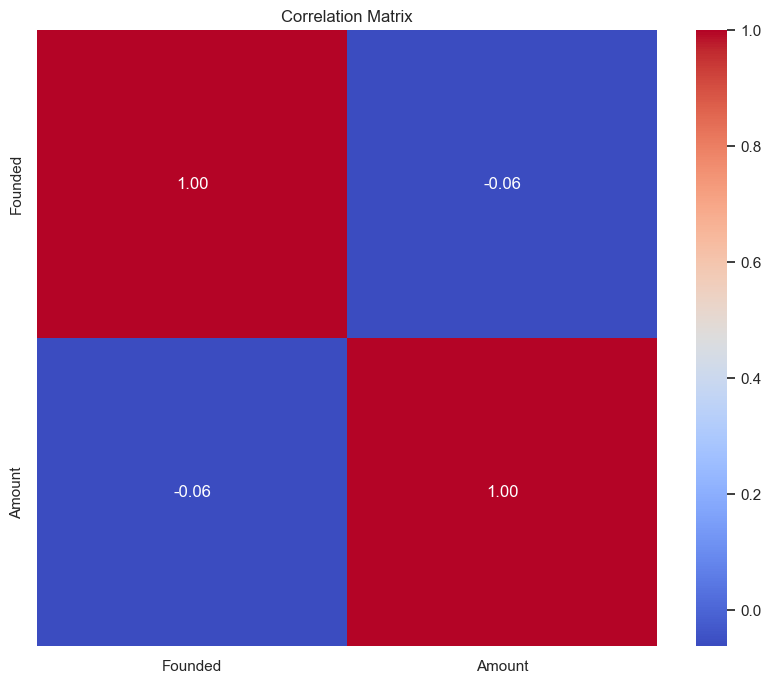

In [115]:

numeric_data = merged_data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


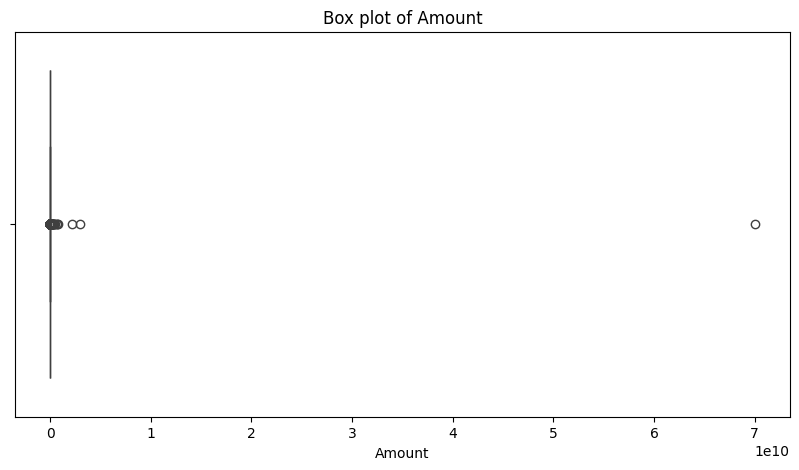

In [20]:
# Checking for Outliers

import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=merged_data[column])
    plt.title(f'Box plot of {column}')
    plt.show()


In [21]:
# Ensuring that strings are properly formatted

merged_data['Company_Brand'] = merged_data['Company_Brand'].str.strip()
merged_data['Sector'] = merged_data['Sector'].str.strip().str.lower()
merged_data['HeadQuarter'] = merged_data['HeadQuarter'].str.strip()


In [22]:
# checking for logical consistency

# Check for future dates in 'Founded'
future_dates = merged_data[merged_data['Founded'] > 2024]
print("Companies founded in the future:\n", future_dates)

# Check for negative values in 'Amount'
negative_amounts = merged_data[merged_data['Amount'] < 0]
print("Entries with negative amounts:\n", negative_amounts)


Companies founded in the future:
 Empty DataFrame
Columns: [Company_Brand, Founded, HeadQuarter, Sector, What_it_does, Founders, Investor, Amount, Stage]
Index: []
Entries with negative amounts:
 Empty DataFrame
Columns: [Company_Brand, Founded, HeadQuarter, Sector, What_it_does, Founders, Investor, Amount, Stage]
Index: []


In [23]:
# Check for Unique Value

unique_values = merged_data.nunique()
print("Number of unique values in each column:\n", unique_values)


Number of unique values in each column:
 Company_Brand    2152
Founded            34
HeadQuarter       172
Sector            835
What_it_does     2691
Founders         1981
Investor         1778
Amount            321
Stage              75
dtype: int64


**Proxies Creation**

Since the 'Amount' and 'Founded' columns are the numeric colummns, we can create proxies to derive some insights and potential metrics based on the available information.

In [24]:
# Success Metrics Proxy

# Calculate the minimum and maximum values of the 'Amount' column
min_amount = merged_data['Amount'].min()
max_amount = merged_data['Amount'].max()

# Normalize the 'Amount' column using Min-Max scaling
merged_data['Amount_Normalized'] = (merged_data['Amount'] - min_amount) / (max_amount - min_amount)

# Calculate a simple success score based on funding amount and year founded
merged_data['Success_Score'] = merged_data['Amount_Normalized'] * (2021 - merged_data['Founded'])


# Revenue Growth Proxy

# Group by 'Founded' year and calculate the average normalized funding amount
revenue_growth_proxy = merged_data.groupby('Founded')['Amount_Normalized'].mean()

# Reset index to convert the result back to a DataFrame
revenue_growth_proxy = revenue_growth_proxy.reset_index()

# Rename columns for clarity
revenue_growth_proxy.columns = ['Year_Founded', 'Revenue_Growth_Proxy']

# Display the resulting DataFrame
print(revenue_growth_proxy.head())


# Market Expansion Proxy


# Categorize startups into cohorts based on their founding years
bins = [1960, 1990, 2000, 2010, 2020, 2030]  # Define bins for founding years
labels = ['1960s-1980s', '1990s', '2000s', '2010s', '2020s']  # Labels for each cohort
merged_data['Founded_Cohort'] = pd.cut(merged_data['Founded'], bins=bins, labels=labels, right=False)

# Analyze funding trends within each cohort
funding_trends_by_cohort = merged_data.groupby('Founded_Cohort')['Amount'].sum()




   Year_Founded  Revenue_Growth_Proxy
0          1963              0.000040
1          1973              0.031428
2          1978              0.000127
3          1982              0.000300
4          1984              0.000040


In [25]:
#Further cleaning of datasets

import pandas as pd

def clean_data(df):
    # Standardize text columns
    df['Company_Brand'] = df['Company_Brand'].str.lower().str.strip()
    df['What_it_does'] = df['What_it_does'].str.lower().str.strip()
    df['Founders'] = df['Founders'].str.lower().str.strip()
    df['Investor'] = df['Investor'].str.lower().str.strip()
    df['Sector'] = df['Sector'].str.lower().str.strip()
    df['HeadQuarter'] = df['HeadQuarter'].str.lower().str.strip()
    
    # Ensure numerical columns are properly formatted
    df['Amount_Normalized'] = pd.to_numeric(df['Amount_Normalized'], errors='coerce')
    
    # Filter out founding years outside the range 1963 to 2021
    df = df[(df['Founded'] >= 1963) & (df['Founded'] <= 2021)]
    
    # Ensure Amount columns are non-negative
    df = df[df['Amount'] >= 0]
    df = df[df['Amount_Normalized'] >= 0]
    
    # Drop null values from the 'Amount' column
    df = df.dropna(subset=['Amount'])
    
    # Drop duplicate values from the 'Amount' column
    df = df.drop_duplicates(subset=['Amount'])
    
    # Group less frequent categories into 'Other'
    top_brands = df['Company_Brand'].value_counts().nlargest(10).index
    df['Company_Brand'] = df['Company_Brand'].apply(lambda x: x if x in top_brands else 'Other')
    
    # Encode Sector based on frequency
    sector_counts = df['Sector'].value_counts(normalize=True)
    df['Sector_Encoded'] = df['Sector'].map(sector_counts)
    
    # Binning Amount into categories based on quantiles
    df['Amount_Category'] = pd.qcut(df['Amount'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'], duplicates='drop')
    
    # Group founding years into decades for Founded_Cohort
    df['Founded_Cohort'] = pd.cut(df['Founded'], bins=[1963, 1970, 1980, 1990, 2000, 2010, 2021], labels=['1960s', '1970s', '1980s', '1990s', '2000s', '2010s'])
    
    return df

# Clean the merged data
cleaned_data = clean_data(merged_data)

print("\nNumber of unique values in each column:")
print(cleaned_data.nunique())



Number of unique values in each column:
Company_Brand         11
Founded               19
HeadQuarter           45
Sector               146
What_it_does         305
Founders             272
Investor             273
Amount               321
Stage                 31
Amount_Normalized    321
Success_Score        321
Founded_Cohort         5
Sector_Encoded        12
Amount_Category        5
dtype: int64


In [26]:
cleaned_data['Amount'].describe()

count    3.210000e+02
mean     2.653109e+08
std      3.910780e+09
min      7.500000e+03
25%      7.000000e+05
50%      3.964000e+06
75%      1.837000e+07
max      7.000000e+10
Name: Amount, dtype: float64

In [27]:
def define_amount_category(amount):
    if amount < 1000000:
        return 'Very Low'
    elif 1000000 <= amount < 10000000:
        return 'Low'
    elif 10000000 <= amount < 100000000:
        return 'Medium'
    elif 100000000 <= amount < 1000000000:
        return 'High'
    else:
        return 'Very High'

cleaned_data['Amount_Category'] = cleaned_data['Amount'].apply(define_amount_category)


In [28]:
print(cleaned_data['Amount_Category'].unique())


['Very Low' 'Low' 'Medium' 'High' 'Very High']


In [29]:
cleaned_data.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Amount_Normalized,Success_Score,Founded_Cohort,Sector_Encoded,Amount_Category
0,Other,2019,chennai,agritech,cultivating ideas for profit,"prasanna manogaran, bharani c l",angel investors,200000.0,Seed,0.000003,0.000006,2010s,0.037383,Very Low
1,Other,2019,bangalore,edtech,an academy-guardian-scholar centric ecosystem ...,"saurabh dixit, gurudutt upadhyay",gsf accelerator,100000.0,Pre-seed,0.000001,0.000003,2010s,0.074766,Very Low
2,Other,2018,pune,hygiene management,converting bio-hazardous waste to harmless waste,ajinkya dhariya,venture center,2800000.0,Pre-seed,0.000040,0.000120,2010s,0.003115,Low
3,Other,2020,new delhi,escrow,escrow-as-a-service platform,ritesh tiwari,"venture catalysts, pointone capital",400000.0,Seed,0.000006,0.000006,2010s,0.003115,Very Low
4,Other,2016,indore,agritech,gramophone is an agtech platform enabling acce...,"ashish rajan singh, harshit gupta, nishant mah...","siana capital management, info edge",340000.0,Seed,0.000005,0.000024,2010s,0.037383,Very Low


In [30]:
print("\nNumber of unique values in each column:")
print(cleaned_data.nunique())



Number of unique values in each column:
Company_Brand         11
Founded               19
HeadQuarter           45
Sector               146
What_it_does         305
Founders             272
Investor             273
Amount               321
Stage                 31
Amount_Normalized    321
Success_Score        321
Founded_Cohort         5
Sector_Encoded        12
Amount_Category        5
dtype: int64


In [31]:
cleaned_data.info

<bound method DataFrame.info of      Company_Brand  Founded                  HeadQuarter  \
0            Other     2019                      chennai   
1            Other     2019                    bangalore   
2            Other     2018                         pune   
3            Other     2020                    new delhi   
4            Other     2016                       indore   
...            ...      ...                          ...   
2748         Other     2017  bangalore, karnataka, india   
2754         Other     2017  bangalore, karnataka, india   
2758         Other     2017   mumbai, maharashtra, india   
2784         Other     2017  bengaluru, karnataka, india   
2787         Other     2017   mumbai, maharashtra, india   

                                               Sector  \
0                                            agritech   
1                                              edtech   
2                                  hygiene management   
3                  

**Exploratory Data Analysis (EDA)**

In [32]:
# summary Statistics

print(merged_data[['Founded', 'Amount']].describe())


           Founded        Amount
count  2852.000000  2.852000e+03
mean   2016.317321  3.416638e+07
std       3.758018  1.312857e+09
min    1963.000000  7.500000e+03
25%    2015.000000  2.800000e+06
50%    2017.000000  2.800000e+06
75%    2018.000000  2.800000e+06
max    2021.000000  7.000000e+10


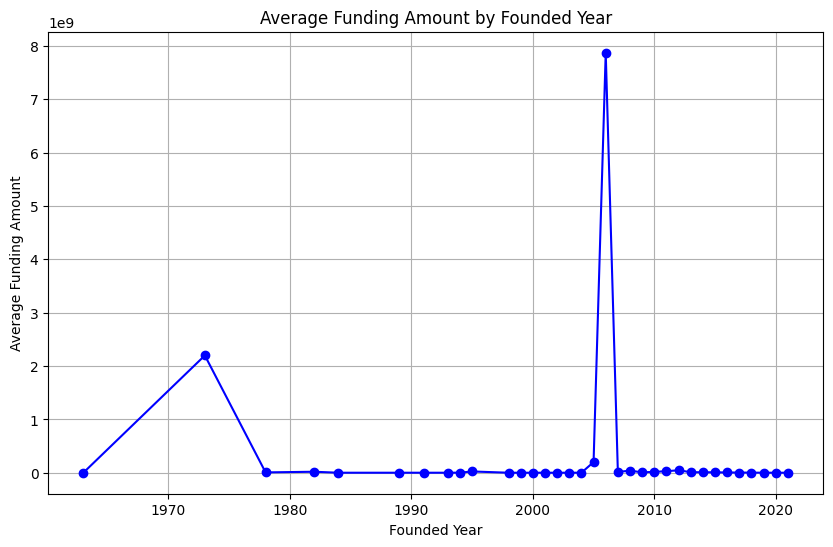

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by Founded year and calculate the average funding amount for each year
average_amount_per_year = merged_data.groupby('Founded')['Amount'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
average_amount_per_year.plot(kind='line', marker='o', color='b')
plt.title('Average Funding Amount by Founded Year')
plt.xlabel('Founded Year')
plt.ylabel('Average Funding Amount')
plt.grid(True)
plt.show()


In [34]:
revenue_growth_proxy.head()

,Year_Founded,Revenue_Growth_Proxy
0,1963,0.000040
1,1973,0.031428
2,1978,0.000127
3,1982,0.000300
4,1984,0.000040


In [35]:
merged_data.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Amount_Normalized,Success_Score,Founded_Cohort
0,aqgromalin,2019,chennai,agritech,cultivating ideas for profit,"prasanna manogaran, bharani c l",angel investors,200000.0,Seed,0.000003,0.000006,2010s
1,krayonnz,2019,bangalore,edtech,an academy-guardian-scholar centric ecosystem ...,"saurabh dixit, gurudutt upadhyay",gsf accelerator,100000.0,Pre-seed,0.000001,0.000003,2010s
2,padcare labs,2018,pune,hygiene management,converting bio-hazardous waste to harmless waste,ajinkya dhariya,venture center,2800000.0,Pre-seed,0.000040,0.000120,2010s
3,ncome,2020,new delhi,escrow,escrow-as-a-service platform,ritesh tiwari,"venture catalysts, pointone capital",400000.0,Seed,0.000006,0.000006,2020s
4,gramophone,2016,indore,agritech,gramophone is an agtech platform enabling acce...,"ashish rajan singh, harshit gupta, nishant mah...","siana capital management, info edge",340000.0,Seed,0.000005,0.000024,2010s


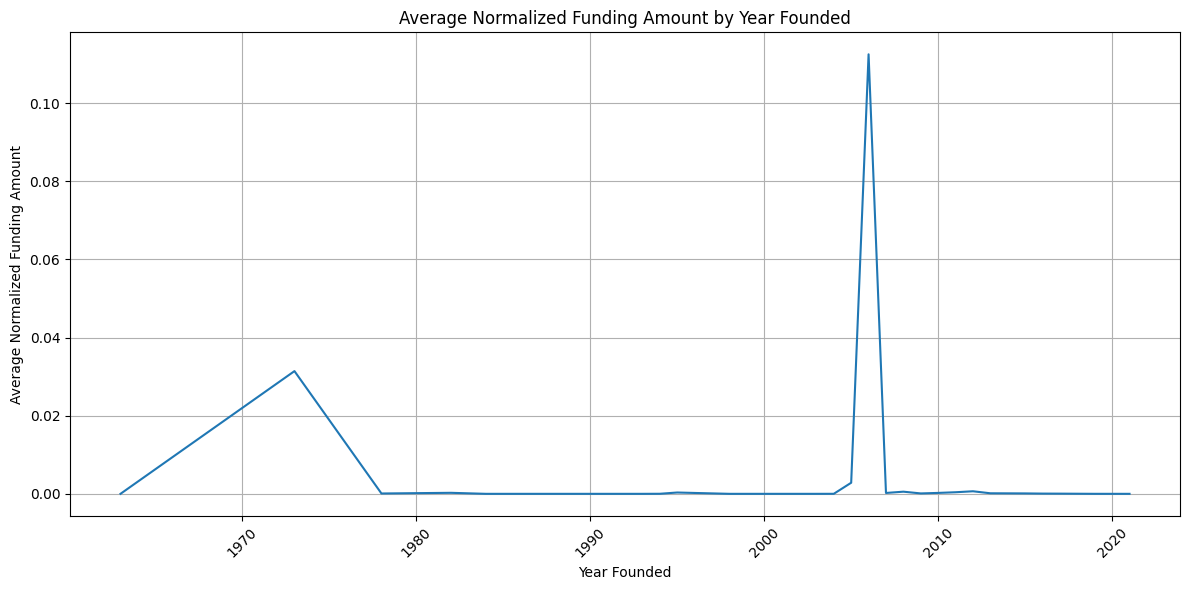

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot for funding trends across cohorts (founding years)
plt.figure(figsize=(12, 6))
sns.lineplot(data=revenue_growth_proxy, x='Year_Founded', y='Revenue_Growth_Proxy')
plt.title('Average Normalized Funding Amount by Year Founded')
plt.xlabel('Year Founded')
plt.ylabel('Average Normalized Funding Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



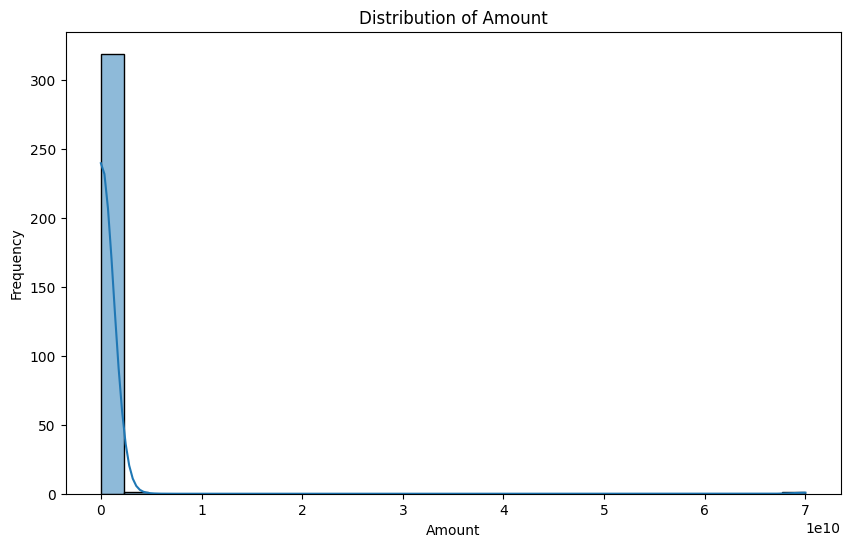

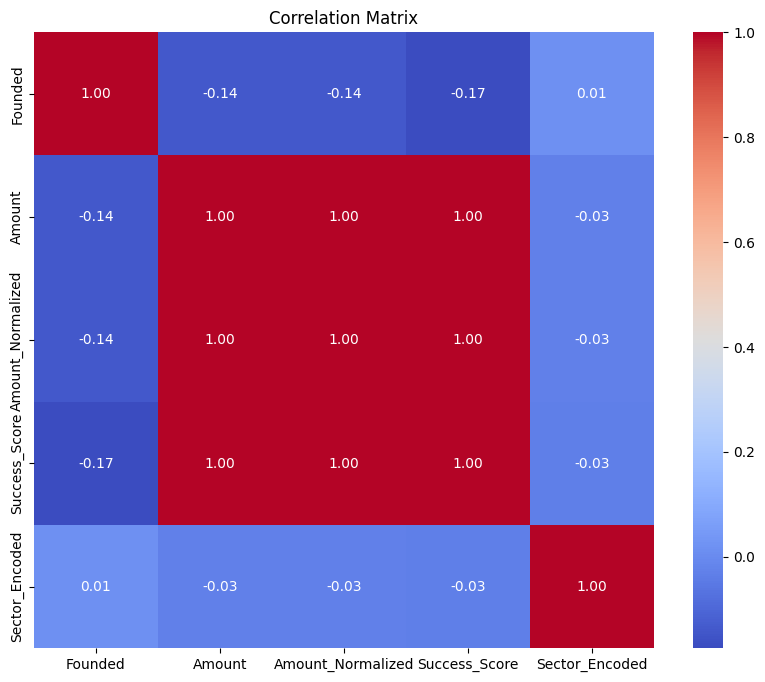

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


# Distribution of Amount
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['Amount'], bins=30, kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Correlation Analysis
numeric_data = cleaned_data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
